# GRIP : The Sparks Foundation 

# Data Science & Business Analytics Internship


# Author : Ajay Ram Meena

# Task 1: Prediction using supervised ML

### Objective: To predict the percentage of marks of a student based on number of hours they studied.

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing all libraries required in this notebook
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

####  The data is provided through an external link. So, firstly we are importing the data here.

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Data has been read & imported successfully")

dataset.head()

Data has been read & imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### pandas have a function describe() which is return statistical summary of data frame.

In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Now we will analyse the provided data by plotting Graph using matplotlib Library

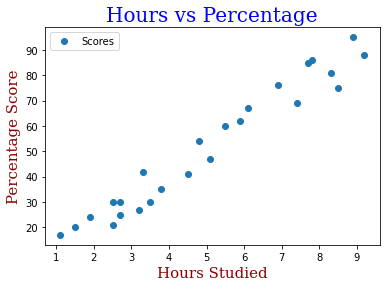

In [5]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o') 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Hours vs Percentage",fontdict = font1)  
plt.xlabel("Hours Studied" , fontdict = font2)  
plt.ylabel("Percentage Score" , fontdict = font2)  
plt.show()

In [6]:
dataset.corr(method ='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Preparing the Data

 The next step is to divide the data into "attributes" and "labels".Our attribute set will consist of the "Hours" column( Attributes are the independent variables), and the label will be the "Score" column(labels are dependent variables whose values are to be predicted).

In [7]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values 
m = len(y) #number of traning example

In [8]:
X = X[:,np.newaxis]


In [9]:
X = X[:,:,0]

In [10]:
y = y[:,np.newaxis]

### ML Simple Linear Regression Algorithm Part


In [11]:
# Please don't run this cell more than one time
theta = np.zeros([2,1])
print(theta)
iterations = 2000
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones,X))
print(X)

[[0.]
 [0.]]
[[1.  2.5]
 [1.  5.1]
 [1.  3.2]
 [1.  8.5]
 [1.  3.5]
 [1.  1.5]
 [1.  9.2]
 [1.  5.5]
 [1.  8.3]
 [1.  2.7]
 [1.  7.7]
 [1.  5.9]
 [1.  4.5]
 [1.  3.3]
 [1.  1.1]
 [1.  8.9]
 [1.  2.5]
 [1.  1.9]
 [1.  6.1]
 [1.  7.4]
 [1.  2.7]
 [1.  4.8]
 [1.  3.8]
 [1.  6.9]
 [1.  7.8]]


In [12]:
def ComputeCost(X,y,theta):
    temp = np.dot(X,theta)-y
    print(temp)
    return np.sum(np.power(temp,2))/(2*m)

In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        temp1 = np.dot(X, theta) - y
        temp1 = np.dot(X.T,temp1)
        theta = theta - (alpha / m) * temp1
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[2.46438177]
 [9.77891737]]


#### Now we will plot the given data set as a scatter plot and the best fit line after ML Model deployed

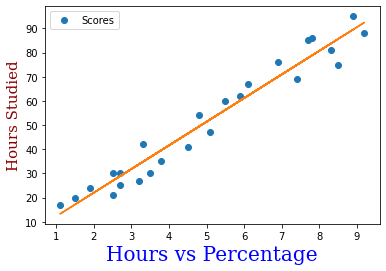

In [14]:
dataset.plot(x='Hours', y='Scores', style='o')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.xlabel("Hours vs Percentage",fontdict = font1)  
plt.ylabel("Hours S tudied" , fontdict = font2)
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

#### Now our ML model is reday to predict  percentage of marks that a student is expected to score based upon the number of hours they studied.

In [15]:
hrs = 9.25
percent =float(theta[0]+theta[1]*hrs)
print("Percentage score if a student studies 9.25hours/day is:",round(percent,2),"%")

Percentage score if a student studies 9.25hours/day is: 92.92 %


###  Evaluating the model
##### So we will make the prediction of our given data and calculate the Mean Absolute Error;  

In [16]:
predictions = []
for i in range(len(X)):
    predict = float(X[i][0]*theta[0]+X[i][1]*theta[1])
    predictions.append(predict)
df = pd.DataFrame({'Actual': dataset.iloc[:,-1].values , 'Predicted': predictions})  
df 

,Actual,Predicted
0,21,26.911675
1,47,52.336860
2,27,33.756917
3,75,85.585179
4,30,36.690593
5,20,17.132758
6,88,92.430422
7,60,56.248427
8,81,83.629396
9,25,28.867459



#### Now, we are finding Mean Absolute error

In [22]:
sum = 0
for i in range(len(X)):
    sum += abs(df.Predicted[i] - df.Actual[i])
print("Mean Absolute Error is:",(sum/25))

Mean Absolute Error is: 4.974136299532978


#### So we can use this ML model to make a pridiction.